In [103]:
#import modules - AFFINITY PROPAGATION
#WILLIAM JONATHAN M , NIM: 2502045683
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
import numpy as np


In [104]:
#reading the data from the csv file
df = pd.read_csv('art_coverage_by_country_clean.csv')
#dropping the null files and changing the datatype
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df['Reported number of people receiving ART'] = df['Reported number of people receiving ART'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         136 non-null    object 
 1   Reported number of people receiving ART                         136 non-null    float64
 2   Estimated number of people living with HIV                      136 non-null    object 
 3   Estimated ART coverage among people living with HIV (%)         136 non-null    object 
 4   Estimated number of people living with HIV_median               136 non-null    float64
 5   Estimated number of people living with HIV_min                  136 non-null    float64
 6   Estimated number of people living with HIV_max                  136 non-null    float64
 7   Estimated ART coverage among people living with HIV (

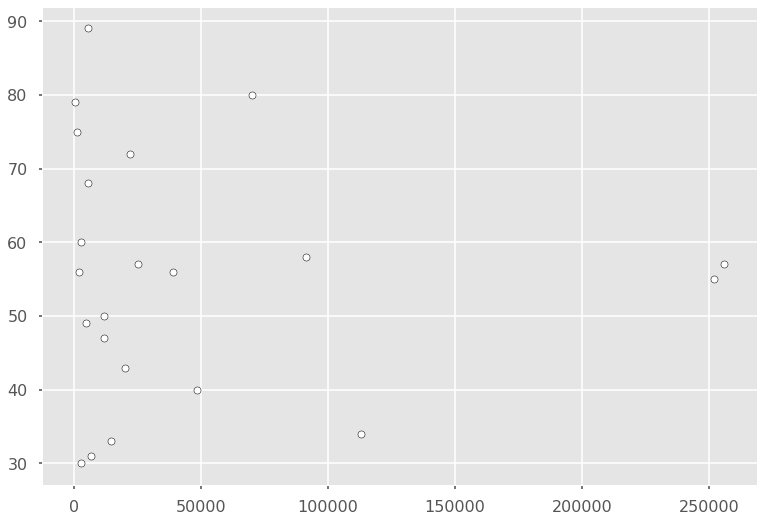

In [105]:
#pakai data tengah 

X = df.iloc[[30,31,32,33,34,35,36,37,38,39,40,50,51,52,53,54,55,56,57,58,59,60],[1,7]]
# X = df.iloc[30:81,[1,7]]
#plotting
plt.scatter(
   df.iloc[[30,31,32,33,34,35,36,37,38,39,40,50,51,52,53,54,55,56,57,58,59,60], 1], df.iloc[[30,31,32,33,34,35,36,37,38,39,40,50,51,52,53,54,55,56,57,58,59,60], 7],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()
#tentuin center
centers = [[1, 1], [-1, -1], [1, -1]]

In [106]:
#clustering
clustering = AffinityPropagation(damping=0.5).fit(X)
clustering
labels_true= clustering.predict(X)
print(labels_true)
z = X.to_numpy()
print(z)

[0 1 3 1 0 1 1 4 3 1 1 1 4 2 3 4 3 1 2 1 1 1]
[[2.52e+05 5.50e+01]
 [1.20e+03 7.50e+01]
 [2.19e+04 7.20e+01]
 [2.60e+03 6.00e+01]
 [2.56e+05 5.70e+01]
 [5.50e+03 8.90e+01]
 [2.70e+03 3.00e+01]
 [3.90e+04 5.60e+01]
 [2.51e+04 5.70e+01]
 [6.70e+03 3.10e+01]
 [1.19e+04 4.70e+01]
 [4.60e+03 4.90e+01]
 [6.99e+04 8.00e+01]
 [1.13e+05 3.40e+01]
 [2.02e+04 4.30e+01]
 [4.86e+04 4.00e+01]
 [1.46e+04 3.30e+01]
 [5.60e+03 6.80e+01]
 [9.15e+04 5.80e+01]
 [1.17e+04 5.00e+01]
 [2.00e+03 5.60e+01]
 [2.50e+02 7.90e+01]]


In [107]:
#CLUSTERING
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_


n_clusters_ = len(cluster_centers_indices)
# n_clusters_ = 3

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 5
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.742


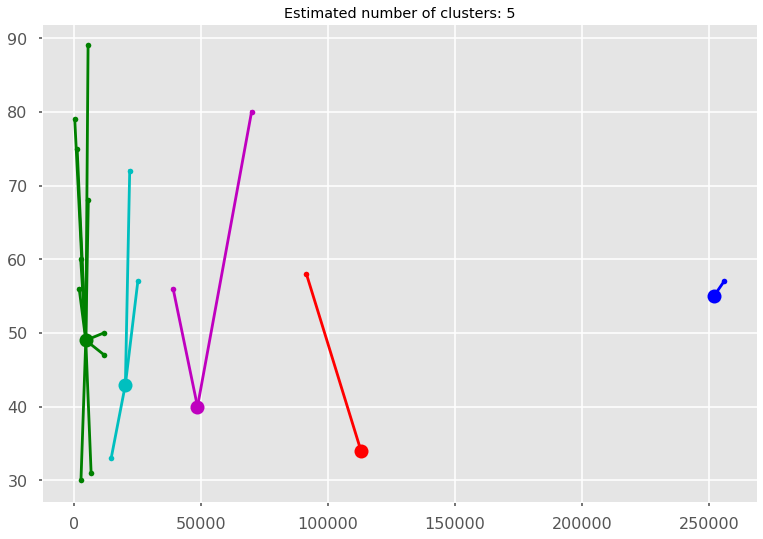

In [108]:
#PLOTTING
plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = z[cluster_centers_indices[k]]
    plt.plot(z[class_members, 0], z[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in z[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

#REFERENCE THAT I USED:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html